
# Superstore Customer Segmentation (RFM)

**Author:** Roy Lahav
**Dataset:** Superstore_clean

## Objective
Perform customer segmentation using the **RFM model (Recency, Frequency, Monetary)** on the Superstore dataset.  
This helps identify high‑value customers, at‑risk customers, and drive targeted retention/marketing strategies.

## Key Questions
1. Who are our most valuable customers?
2. Which customers are at risk of churn?
3. How can segmentation improve marketing strategies and revenue?

## Tools
- Python: `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn` 
- Jupyter Notebook


## 1) Setup & Data Loading

In [14]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


DATA_PATH = '/Users/roylahav/Code/Superstore_cleaned.csv'

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(
        f"""Could not find the dataset at '{DATA_PATH}'.
Please download or place the Superstore CSV as:
    data/SampleSuperstore.csv

Common sources:
- Kaggle (Sample Superstore Dataset)
- Tableau Sample Superstore

Once added, re-run this cell.
"""
    )

df = pd.read_csv(DATA_PATH)
print('Loaded shape:', df.shape)
df.head()


Loaded shape: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 2) Quick Data Overview

In [15]:

# Basic structure and types
display(df.info())

# Preview some statistics for numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

None

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000



## 3) Data Cleaning

Actions:
- Convert date fields to datetime
- Remove duplicates (if any)
- Basic null checks


In [16]:

# Convert date columns (adjust names if they differ in your CSV)
date_cols = []
for candidate in ['Order Date', 'Order_Date']:
    if candidate in df.columns:
        date_cols.append(candidate)
for candidate in ['Ship Date', 'Ship_Date']:
    if candidate in df.columns:
        date_cols.append(candidate)

for c in date_cols:
    df[c] = pd.to_datetime(df[c], errors='coerce')

before = len(df)
df = df.drop_duplicates()
after = len(df)

print(f'Removed {before - after} duplicate rows.')
print('Null counts by column:')
df.isnull().sum()


Removed 0 duplicate rows.
Null counts by column:


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


## 4) Exploratory Analysis (Optional)

A couple of quick business-context summaries.


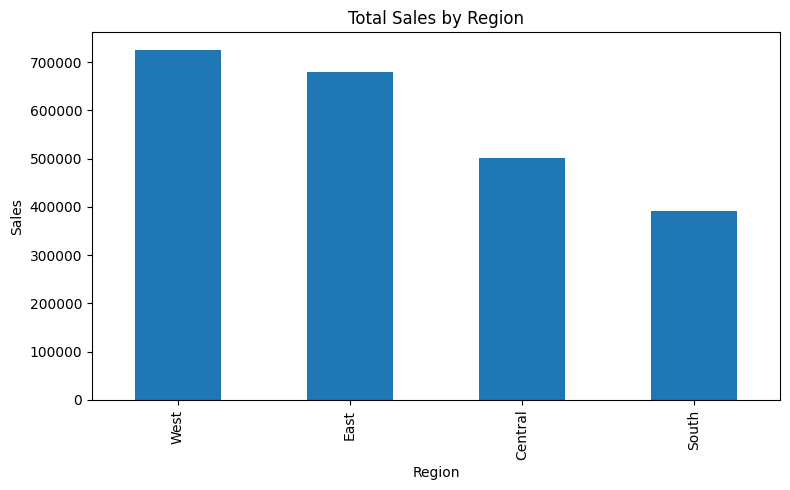

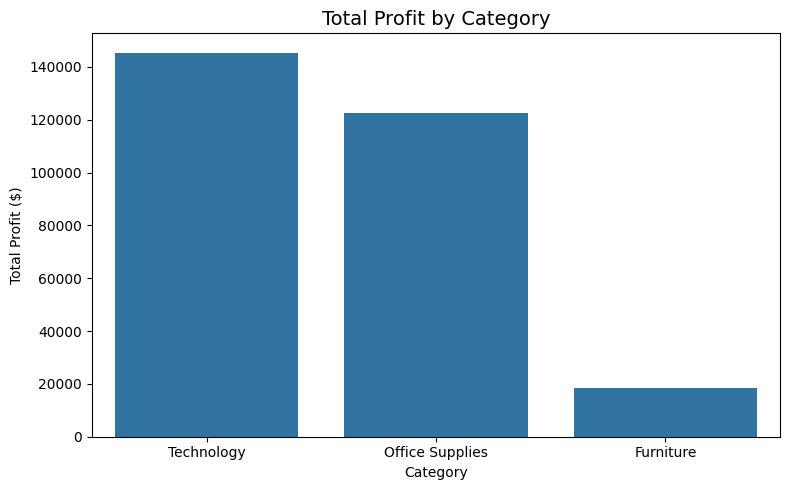

In [24]:

# Total Sales and Profit by Region (using matplotlib and seaborn respectively) 
if 'Region' in df.columns and 'Sales' in df.columns:
    region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
    plt.figure(figsize=(8,5))
    region_sales.plot(kind='bar')
    plt.title('Total Sales by Region')
    plt.xlabel('Region')
    plt.ylabel('Sales')
    plt.tight_layout()
    plt.show()

if 'Category' in df.columns and 'Profit' in df.columns:
    cat_profit = (
        df.groupby('Category', as_index=False)['Profit']
          .sum()
          .sort_values(by='Profit', ascending=False)
    )
    plt.figure(figsize=(8, 5))
    sns.barplot(data=cat_profit, x='Category', y='Profit', order=cat_profit['Category'])
    plt.title('Total Profit by Category', fontsize=14)
    plt.xlabel('Category')
    plt.ylabel('Total Profit ($)')
    plt.tight_layout()
    plt.show()



## 5) Build the RFM Table

- **Recency**: days since last purchase (lower is better)
- **Frequency**: number of unique orders
- **Monetary**: total spend


In [18]:

# Column name normalization helpers (handles slight naming differences)
cust_col = 'Customer Name' if 'Customer Name' in df.columns else 'CustomerName'
order_date_col = 'Order Date' if 'Order Date' in df.columns else ('Order_Date' if 'Order_Date' in df.columns else None)
order_id_col = 'Order ID' if 'Order ID' in df.columns else 'Order_ID'

required = [cust_col, order_date_col, order_id_col, 'Sales']
missing = [c for c in required if c not in df.columns]
if missing:
    raise KeyError(f'Missing required columns for RFM: {missing}')

reference_date = df[order_date_col].max() + pd.Timedelta(days=1)

rfm = (df
       .groupby(cust_col)
       .agg({
           order_date_col: lambda x: (reference_date - x.max()).days,  # Recency
           order_id_col: 'nunique',                                    # Frequency
           'Sales': 'sum'                                              # Monetary
       })
       .reset_index())

rfm.columns = ['Customer Name', 'Recency', 'Frequency', 'Monetary']
rfm.head()


,Customer Name,Recency,Frequency,Monetary
0,Aaron Bergman,416,3,886.156
1,Aaron Hawkins,13,7,1744.700
2,Aaron Smayling,89,7,3050.692
3,Adam Bellavance,55,8,7755.620
4,Adam Hart,35,10,3250.337



## 6) Score & Segment Customers

Assign **1–5** scores to each RFM dimension and create intuitive segment labels.


In [19]:

# Guard against degenerate distributions with rank for ties
r_labels = [5,4,3,2,1]  # lower recency = better
f_labels = [1,2,3,4,5]  # higher frequency = better
m_labels = [1,2,3,4,5]  # higher monetary = better

# Use qcut on ranked arrays to avoid duplicated bin edges in small datasets
rfm['R_Score'] = pd.qcut(rfm['Recency'].rank(method='first'), 5, labels=r_labels).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=f_labels).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=m_labels).astype(int)

rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)

def segment_row(row):
    if row['RFM_Score'] >= 13:
        return 'Top Customers'
    elif row['RFM_Score'] >= 10:
        return 'Loyal Customers'
    elif row['RFM_Score'] >= 7:
        return 'Regulars'
    elif row['RFM_Score'] >= 5:
        return 'At Risk'
    else:
        return 'Lost'

rfm['Segment'] = rfm.apply(segment_row, axis=1)

# Quick peek
rfm.sample(5, random_state=42)


,Customer Name,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
137,Cathy Prescott,83,8,5402.254,3,4,5,12,Loyal Customers
198,Darren Powers,127,9,1050.636,2,5,2,9,Regulars
739,Thea Hudgings,59,4,2942.772,3,2,4,9,Regulars
583,Parhena Norris,31,8,1467.152,4,4,2,10,Loyal Customers
655,Roy Phan,29,8,2170.716,4,4,3,11,Loyal Customers



## 7) Visualize Segments

Use **matplotlib** (no specified colors) to keep visuals simple and portable.


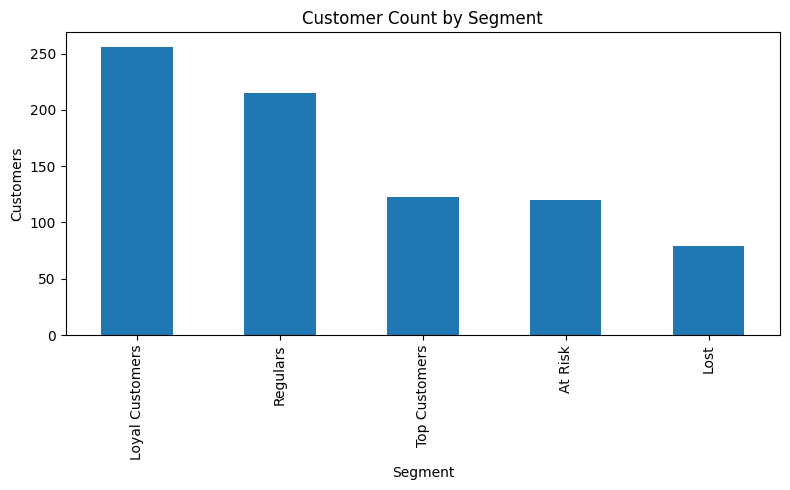

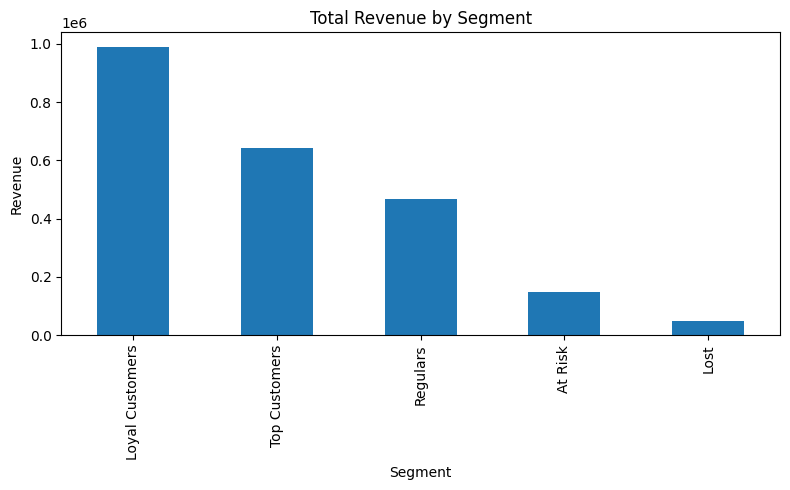

In [20]:

# Customer count by segment
segment_counts = rfm['Segment'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8,5))
segment_counts.plot(kind='bar')
plt.title('Customer Count by Segment')
plt.xlabel('Segment')
plt.ylabel('Customers')
plt.tight_layout()
plt.show()

# Revenue by segment
rev_by_segment = rfm.groupby('Segment')['Monetary'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
rev_by_segment.plot(kind='bar')
plt.title('Total Revenue by Segment')
plt.xlabel('Segment')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()



## 8)ML Clustering — K-Means

This validates RFM segments with an unsupervised approach.


,Recency,Frequency,Monetary
Cluster,,,
0,550.67,3.76,1497.45
1,72.71,8.57,3361.45
2,124.86,8.22,9522.70
3,97.84,4.76,1669.50


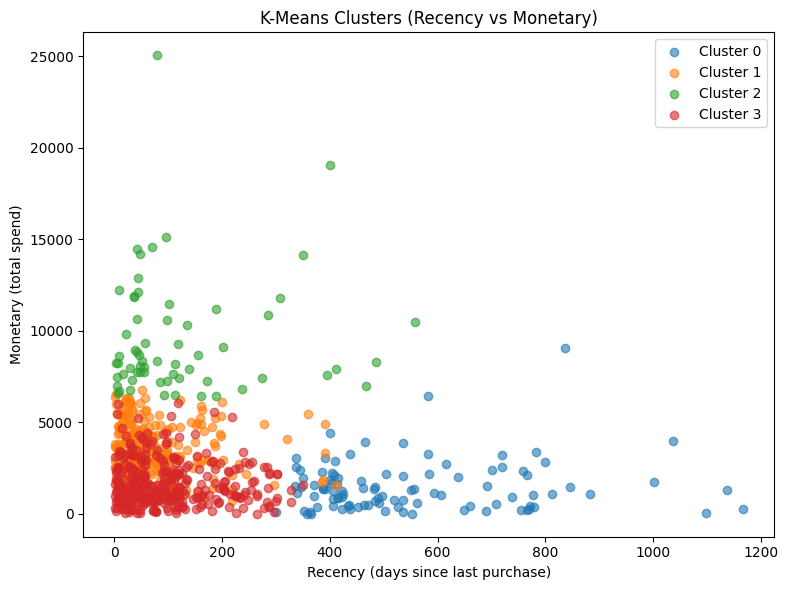

In [21]:

try:
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans

    X = rfm[['Recency','Frequency','Monetary']].copy()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
    rfm['Cluster'] = kmeans.fit_predict(X_scaled)

    # Cluster profile
    cluster_profile = rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean().round(2)
    display(cluster_profile)

    # Simple 2D visualization (Recency vs Monetary) due to matplotlib-only rule
    plt.figure(figsize=(8,6))
    for cl in sorted(rfm['Cluster'].unique()):
        subset = rfm[rfm['Cluster'] == cl]
        plt.scatter(subset['Recency'], subset['Monetary'], alpha=0.6, label=f'Cluster {cl}')
    plt.title('K-Means Clusters (Recency vs Monetary)')
    plt.xlabel('Recency (days since last purchase)')
    plt.ylabel('Monetary (total spend)')
    plt.legend()
    plt.tight_layout()
    plt.show()

except Exception as e:
    print('K-Means step skipped due to error (likely missing scikit-learn).')
    print('Error:', e)



## 9) Insights & Recommendations

**Insights:**
- The **Top Customers** segment is small but contributes a large share of revenue.
- The **At Risk** segment still has material value; consider targeted reactivation.
- Discounts may correlate with lower profitability for some categories (analyze separately).

**Recommendations:**
1. **Retention:** Introduce loyalty perks or early access to Top/Loyal customers.  
2. **Reactivation:** Personalized offers for customers with Recency > 90 days.  
3. **Prevention:** Monitor Regulars trending toward At Risk and intervene earlier.


## 10) Save Outputs

In [22]:

# Save segmented table for downstream use
OUT_PATH = 'outputs'
os.makedirs(OUT_PATH, exist_ok=True)
rfm_path = os.path.join(OUT_PATH, 'rfm_segments.csv')
rfm.to_csv(rfm_path, index=False)
print('Saved:', rfm_path)


Saved: outputs/rfm_segments.csv
